In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Read data
data = pd.read_csv('/Users/mario.iuliano/marios_env/Portfolio/test/feature_selection/churn/telco.csv')

In [3]:
# Explore 
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Normalize column names 
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [5]:
data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Info 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [7]:
# Total customers 
data.customerid.nunique() == data.shape[0]
# Each row is a customer, no duplicates

True

In [8]:
# Distribution of churn 
data.churn.value_counts(normalize=True)
# Churn class is imbalanced, 73% of customers are not churning

churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [9]:
# Convert numerical columns to numeric
data.tenure = data.tenure.astype('int') 

In [10]:
# Total charges have no values - Why? 
data[data.totalcharges == ' ']
# Not sure whether missing values are due to customers being new or not having a total charge- As the impact is minimum, we will drop these rows
data = data[data.totalcharges != ' ']
data.totalcharges = data.totalcharges.astype('float')

In [11]:
data.describe(include = ['O'])

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [12]:
# Drop customer id
data.drop(columns = ['customerid'], inplace = True)

In [13]:
data['churn_num'] = data.churn.map({'No': 0, 'Yes': 1})

gender
Male      0.504693
Female    0.495307
Name: proportion, dtype: float64


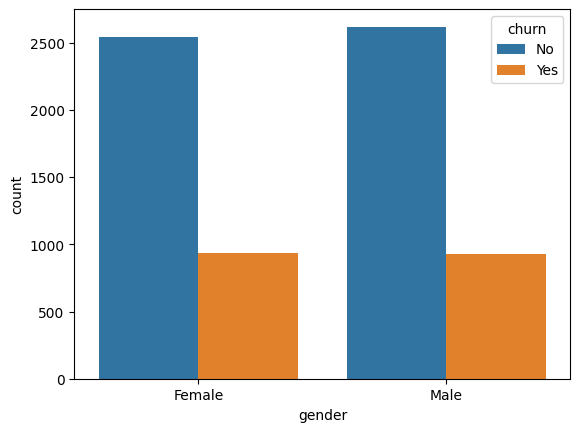

partner
No     0.517491
Yes    0.482509
Name: proportion, dtype: float64


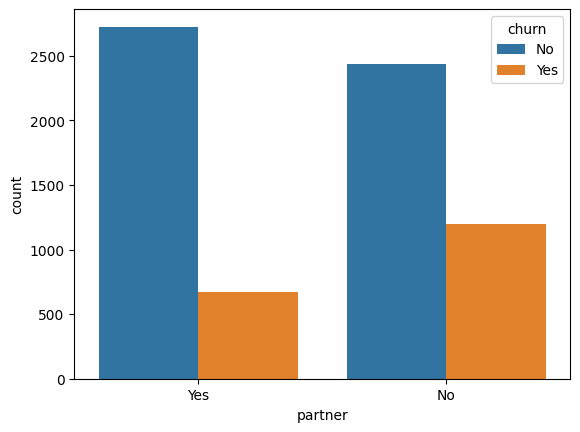

dependents
No     0.701507
Yes    0.298493
Name: proportion, dtype: float64


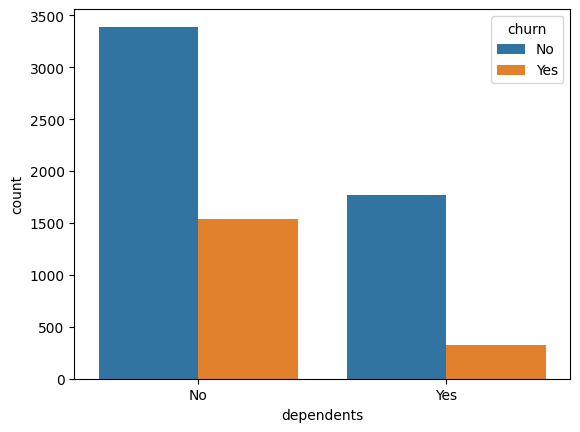

phoneservice
Yes    0.903299
No     0.096701
Name: proportion, dtype: float64


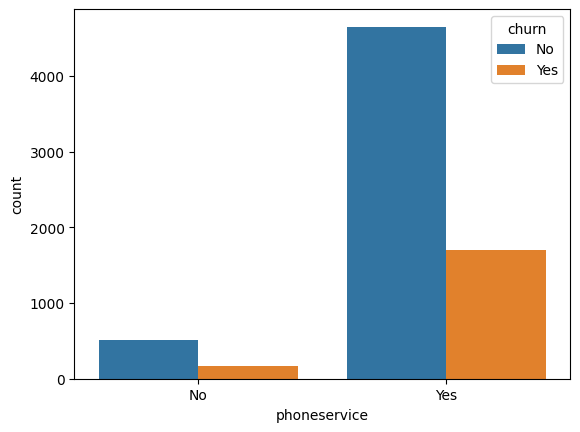

multiplelines
No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: proportion, dtype: float64


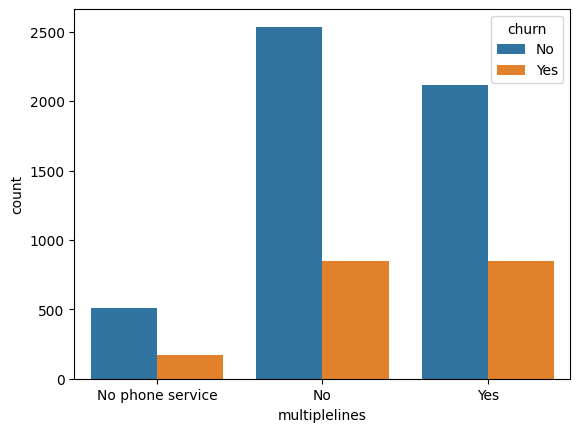

internetservice
Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: proportion, dtype: float64


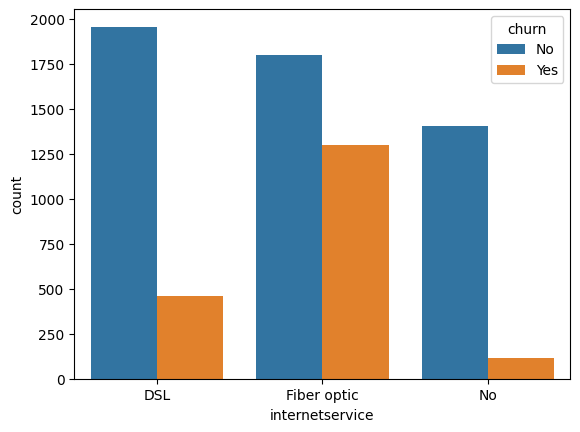

onlinesecurity
No                     0.497298
Yes                    0.286547
No internet service    0.216155
Name: proportion, dtype: float64


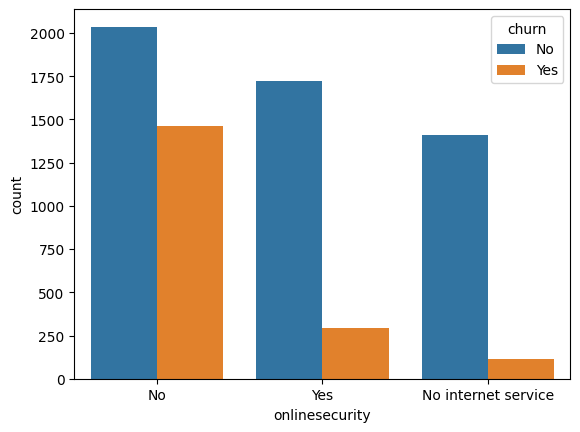

onlinebackup
No                     0.438993
Yes                    0.344852
No internet service    0.216155
Name: proportion, dtype: float64


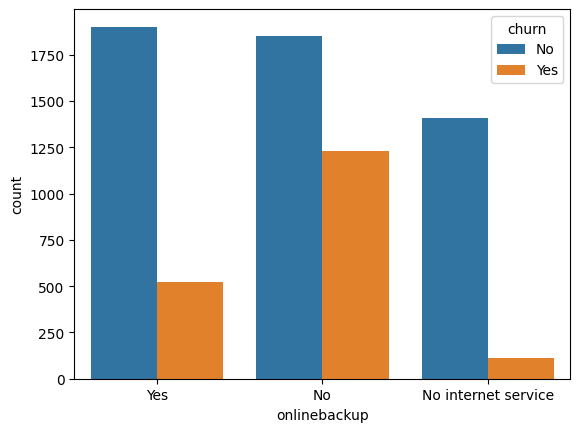

deviceprotection
No                     0.439989
Yes                    0.343857
No internet service    0.216155
Name: proportion, dtype: float64


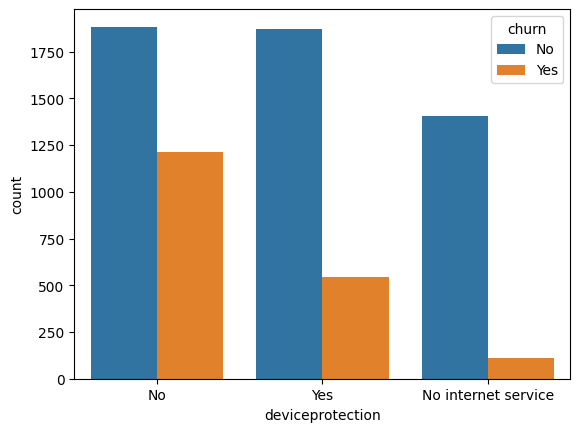

techsupport
No                     0.493743
Yes                    0.290102
No internet service    0.216155
Name: proportion, dtype: float64


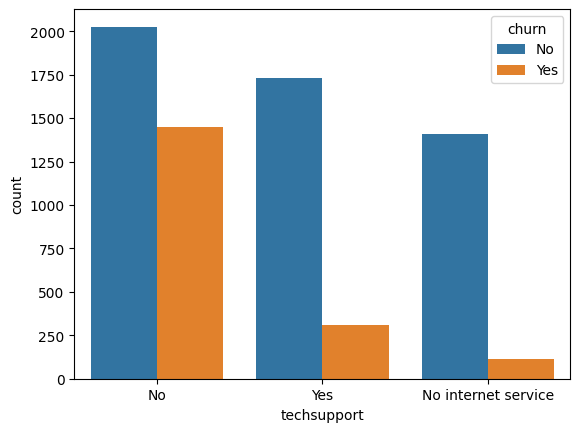

streamingtv
No                     0.399460
Yes                    0.384386
No internet service    0.216155
Name: proportion, dtype: float64


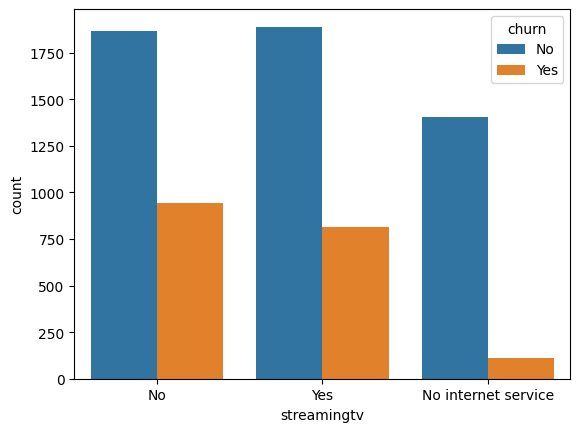

streamingmovies
No                     0.395478
Yes                    0.388367
No internet service    0.216155
Name: proportion, dtype: float64


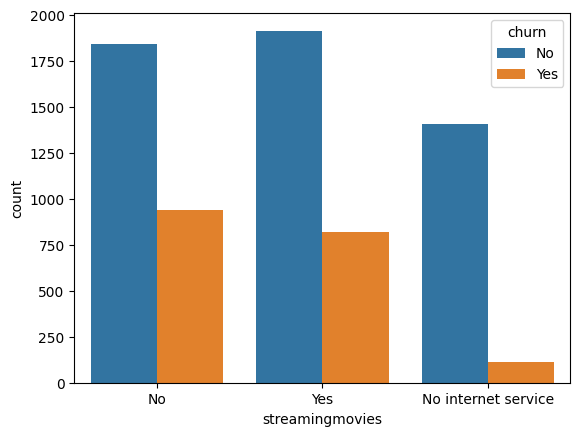

contract
Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: proportion, dtype: float64


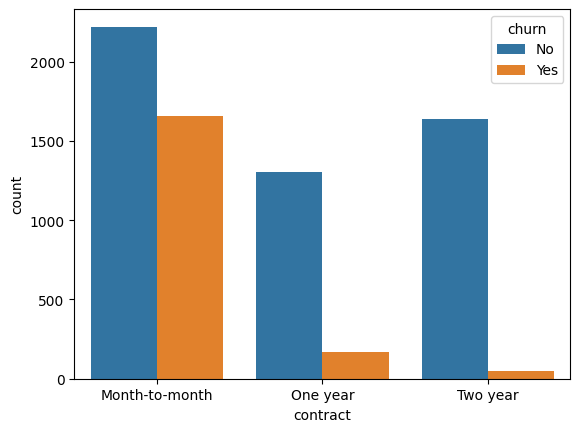

paperlessbilling
Yes    0.592719
No     0.407281
Name: proportion, dtype: float64


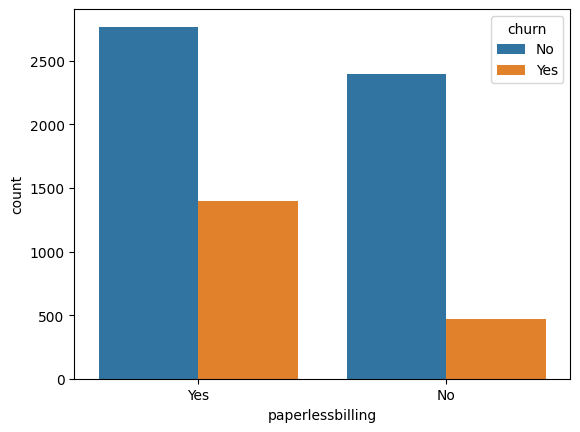

paymentmethod
Electronic check             0.336320
Mailed check                 0.228100
Bank transfer (automatic)    0.219283
Credit card (automatic)      0.216297
Name: proportion, dtype: float64


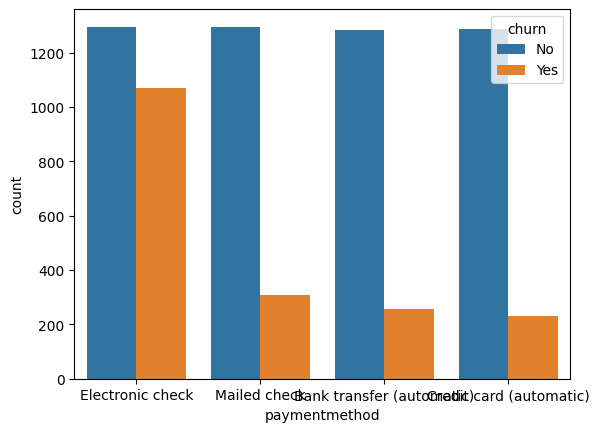

churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


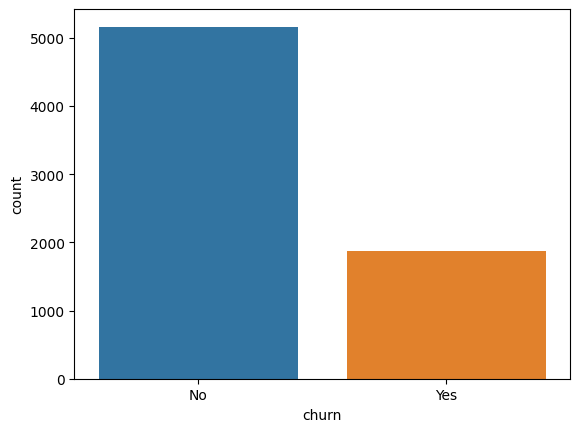

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns  

for col in data.select_dtypes(include = ['O']).columns:
    sns.countplot(x = col, hue = 'churn', data = data)
    print(data[col].value_counts(normalize = True))
    plt.show()

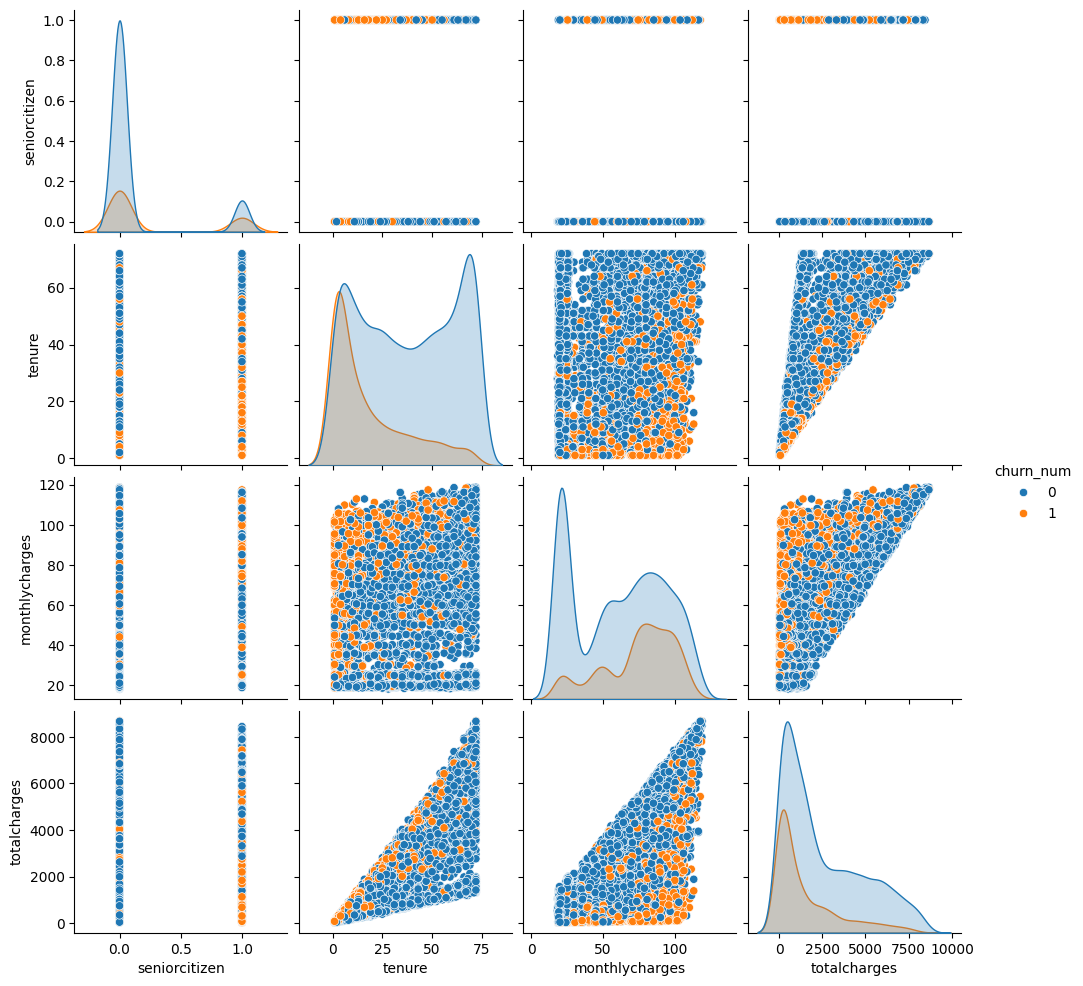

In [15]:
sns.pairplot(data, hue = 'churn_num', diag_kind = 'kde')
plt.show()

In [16]:
data.corr(numeric_only = True).style.background_gradient(cmap = 'coolwarm')

,seniorcitizen,tenure,monthlycharges,totalcharges,churn_num
seniorcitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
monthlycharges,0.219874,0.246862,1.000000,0.651065,0.192858
totalcharges,0.102411,0.825880,0.651065,1.000000,-0.199484
churn_num,0.150541,-0.354049,0.192858,-0.199484,1.000000


## Insights 
- Churn is negatively correlated with tenure, showing that retention is highly important in the first customer life time.
  

In [72]:
from sklearn.preprocessing import OneHotEncoder

X_encoder = data.drop(columns = ['churn', 'churn_num'])
categorical_cols = X_encoder.select_dtypes(include = ['O'])
ohe =OneHotEncoder(sparse_output = False)
X_encoded = ohe.fit_transform(categorical_cols)

In [73]:
# Create dataframe 
X_endcoded_df = pd.DataFrame(X_encoded, 
                             columns=ohe.get_feature_names_out(categorical_cols.columns),
                             index=categorical_cols.index)  # <-- Important


In [74]:
from sklearn.feature_selection import chi2
y = data.churn_num
# Run chi2 test
chi2_stats, p_values = chi2(X_encoded, y)

In [75]:
chi2_df = pd.DataFrame({'feature': ohe.get_feature_names_out(categorical_cols.columns), 'chi2_stat': chi2_stats, 'p_value': p_values})

In [76]:
chi2_df_sorted = chi2_df.sort_values(by='chi2_stat', ascending=False)

In [77]:
chi2_df['original_feature'] = chi2_df['feature'].apply(lambda x: x.split('_')[0])
chi2_summary = chi2_df.groupby('original_feature')['chi2_stat'].sum().sort_values(ascending=False)


In [78]:
chi2_features_selected = chi2_summary > 100
chi2_features_selected = chi2_summary[chi2_features_selected].index.tolist()
chi2_corr = chi2_df[chi2_df['original_feature'].isin(chi2_features_selected)].feature

In [95]:
chi2_features_selected

['contract',
 'onlinesecurity',
 'techsupport',
 'internetservice',
 'paymentmethod',
 'onlinebackup',
 'deviceprotection',
 'streamingmovies',
 'streamingtv',
 'paperlessbilling',
 'dependents',
 'partner']

In [79]:
# chi2_corr = chi2_df[chi2_df['original_feature'].isin(chi2_features_selected)].feature
# plt.figure(figsize=(40, 40))

# sns.heatmap(X_endcoded_df[chi2_corr].corr(), annot = True, cmap = 'coolwarm')

In [80]:
# train and test var
X = X_endcoded_df[chi2_corr]

In [81]:
data.shape

(7032, 21)

In [82]:
X = X.join(data[['tenure', 'monthlycharges' ]])
y = data.churn_num

In [88]:
# Upsample minority class 
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [85]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[902 131]
 [193 181]]


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1033
           1       0.58      0.48      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



In [89]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=10,random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[901 136]
 [206 823]]


In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1037
           1       0.86      0.80      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.84      0.83      0.83      2066
weighted avg       0.84      0.83      0.83      2066

